In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
ALL_DATA=pd.read_csv('DATOS.csv')

In [3]:
ALL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83327 entries, 0 to 83326
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       83327 non-null  int64  
 1   SUCURSAL         83327 non-null  object 
 2   FECHA_VENTA      83327 non-null  object 
 3   FECHA_REGISTRO   83327 non-null  object 
 4   PROVEEDOR        83327 non-null  object 
 5   FOLIO_VENTA      83327 non-null  float64
 6   TIPO_VENTA       83327 non-null  object 
 7   CANTIDAD_VENTA   83327 non-null  float64
 8   TOTAL_VENTA      83327 non-null  float64
 9   CODIGO_BARRAS    83327 non-null  int64  
 10  DTO_CLIENTE      83327 non-null  float64
 11  TITULO           83327 non-null  object 
 12  TIPO_PRODUCTO    83327 non-null  object 
 13  PVP              83327 non-null  float64
 14  AUTOR            83327 non-null  object 
 15  TEMA             83327 non-null  object 
 16  SUBTEMA          83327 non-null  object 
 17  DTO_COMERCIA

In [4]:
ALL_DATA.FECHA_VENTA.unique()

array(['11/04/2022 12:00:31', '12/07/2019 12:47:42',
       '07/03/2019 14:30:22', ..., '10/08/2019 13:49:31',
       '20/12/2019 14:28:36', '01/11/2022 16:19:43'], dtype=object)

### Del formato de fecha se puede extraer la informacionon del momento exacto de cada venta

In [6]:
F_v=ALL_DATA.FECHA_VENTA
F_ve=F_v.str.split(expand=True)
F_ven=F_ve[1].str.split('[:]', expand=True)
DMA_ven=F_ve[0].str.split('[/]', expand=True)
Fecha_ven=pd.to_datetime(DMA_ven[2]+'/'+DMA_ven[1]+'/'+DMA_ven[0])
ALL_DATA['Num_dia_ven']= DMA_ven[0]                                    # Dia de venta
ALL_DATA['FECHA_ven'] = Fecha_ven                                      #Fecha
ALL_DATA['N_dia_ven'] = Fecha_ven.dt.day_name(locale = 'Spanish')    #coloca el nombre del dia
ALL_DATA['N_mes_ven'] = Fecha_ven.dt.month_name(locale = 'Spanish') 
ALL_DATA['hora_ven']= F_ven[0]                                      #hora de venta
ALL_DATA['hora_ven_min']= F_ven[0]+':'+F_ven[1]                     #hora y minuto de venta
ALL_DATA['PERIODO']=DMA_ven[2]
ALL_DATA['MES']=DMA_ven[1]

Fecha_reg=pd.to_datetime(ALL_DATA['FECHA_REGISTRO'])
ALL_DATA['FECHA_REGISTRO']=pd.to_datetime(ALL_DATA['FECHA_REGISTRO'])   #se iguala el formato final de fechas

In [7]:
dias=(Fecha_ven - Fecha_reg).dt.days 
ALL_DATA['FONDO_90d'] = np.where(dias > 90, 'FONDO', 'NOVEDAD')
ALL_DATA['FONDO_180d'] = np.where(dias > 180, 'FONDO', 'NOVEDAD')
ALL_DATA['FONDO_540d'] = np.where(dias > 540, 'FONDO', 'NOVEDAD')
ALL_DATA['FONDO_1080d'] = np.where(dias > 1080, 'FONDO', 'NOVEDAD')

### Exploracion de datos

In [8]:
VENTA=ALL_DATA.groupby(pd.Grouper(key='FECHA_ven',freq='1d')).sum()[['TOTAL_VENTA']]
lista=VENTA.TOTAL_VENTA.tolist()
a,suma=0,[]
for i in lista:
    a=a+i
    suma.append(a)
VENTA['VENTA_ACUMULADA']=suma

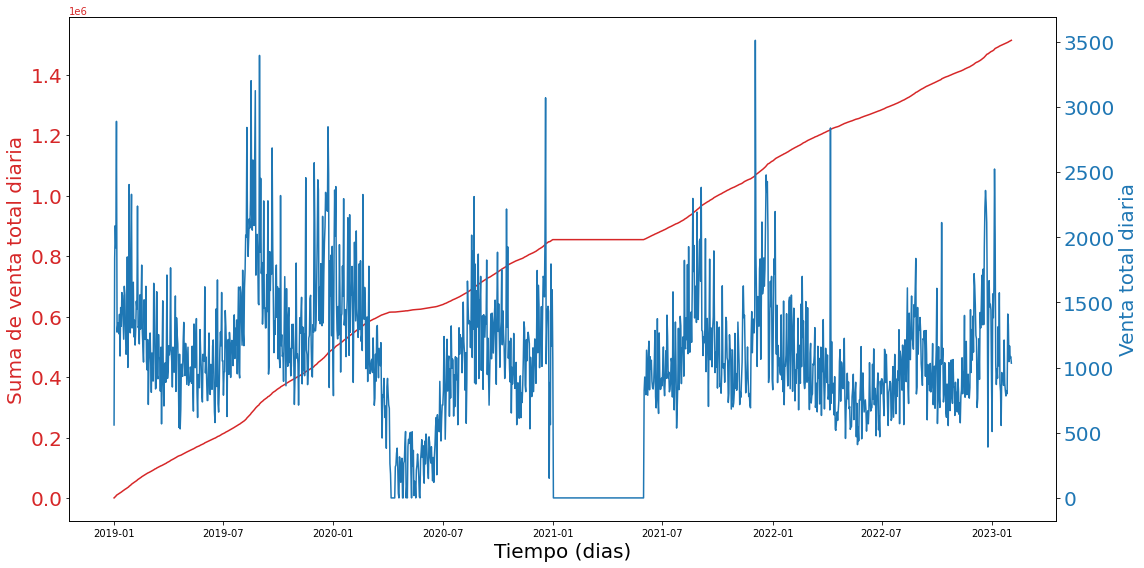

In [9]:
rcParams['figure.figsize'] = 16, 8

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Tiempo (dias)', fontsize=20)
ax1.set_ylabel('Suma de venta total diaria', color=color, fontsize=20)
ax1.plot(VENTA.VENTA_ACUMULADA, color=color)
ax1.tick_params(axis='y', labelcolor=color,labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Venta total diaria', color=color, fontsize=20)  # we already handled the x-label with ax1
ax2.plot(VENTA.TOTAL_VENTA, color=color)
ax2.tick_params(axis='y', labelcolor=color ,labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#3plt.savefig('Ventas_19_20_21_todo')
plt.show()


<AxesSubplot:xlabel='FECHA_ven'>

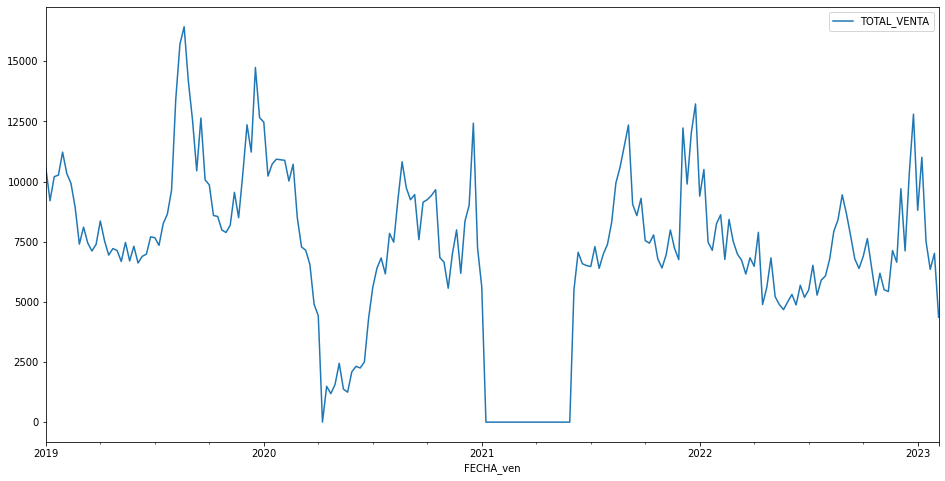

In [10]:
ALL_DATA.groupby(pd.Grouper(key='FECHA_ven',freq='1w')).sum()[['TOTAL_VENTA']].plot()


In [11]:
EXPLORA_1=ALL_DATA.groupby(['N_dia_ven']).sum()[['TOTAL_VENTA','CANTIDAD_VENTA']]
EXPLORA_1

,TOTAL_VENTA,CANTIDAD_VENTA
N_dia_ven,,
Domingo,184765.441034,11359.0
Jueves,214161.263447,13203.0
Lunes,197757.087698,12275.0
Martes,210434.846285,13063.0
Miércoles,214964.990706,13356.0
Sábado,266205.608282,16256.0
Viernes,224926.082546,14213.0


In [12]:
EXPLORA_1*100/EXPLORA_1.sum()

,TOTAL_VENTA,CANTIDAD_VENTA
N_dia_ven,,
Domingo,12.210122,12.119499
Jueves,14.152729,14.086957
Lunes,13.068668,13.096826
Martes,13.906471,13.937583
Miércoles,14.205843,14.250200
Sábado,17.592051,17.344358
Viernes,14.864116,15.164577


In [13]:
EXPLORA_2=ALL_DATA.groupby(['N_mes_ven']).sum()[['TOTAL_VENTA']]
EXPLORA_2*100/EXPLORA_2.sum()

,TOTAL_VENTA
N_mes_ven,
Abril,4.372054
Agosto,12.230962
Diciembre,12.832179
Enero,11.065672
Febrero,7.502961
Julio,8.092169
Junio,6.200160
Marzo,6.025859
Mayo,3.973010


In [14]:
lista=['2019', '2020', '2021', '2022']
EXPLORA=pd.DataFrame()
for i in lista:
    EXPLORA1=ALL_DATA[ALL_DATA['PERIODO']==i].groupby(['N_mes_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=lista

In [15]:
EXPLORA

,2019,2020,2021,2022
N_mes_ven,,,,
Abril,32190.381494,6798.118172,NaN,27170.094661
Agosto,63399.604582,40986.348278,44703.950480,35990.886478
Diciembre,56152.209033,41662.900981,51861.013264,44502.371001
Enero,47035.262667,48988.208687,NaN,36793.559102
Febrero,37558.498386,42267.801104,NaN,31590.778955
Julio,36027.845124,29320.182539,30618.207169,26485.699975
Junio,30770.805256,12694.632808,28252.608358,22103.721296
Marzo,33508.997725,28702.878575,NaN,28972.343322
Mayo,30590.091311,7242.889033,NaN,22287.211819


In [16]:
mes=EXPLORA*100/EXPLORA.sum()
mes=mes.sort_values(by='2019',ascending=False)
mes

,2019,2020,2021,2022
N_mes_ven,,,,
Agosto,12.881770,11.317868,17.245214,9.916564
Diciembre,11.409217,11.504690,20.006158,12.261733
Septiembre,10.000347,10.529801,15.687861,8.507790
Enero,9.556802,13.527482,NaN,10.137725
Octubre,7.729196,10.226817,12.161904,7.808539
Noviembre,7.654532,7.816559,12.188570,7.665897
Febrero,7.631277,11.671725,NaN,8.704203
Julio,7.320273,8.096402,11.811429,7.297602
Marzo,6.808484,7.925941,NaN,7.982746


<AxesSubplot:ylabel='N_mes_ven'>

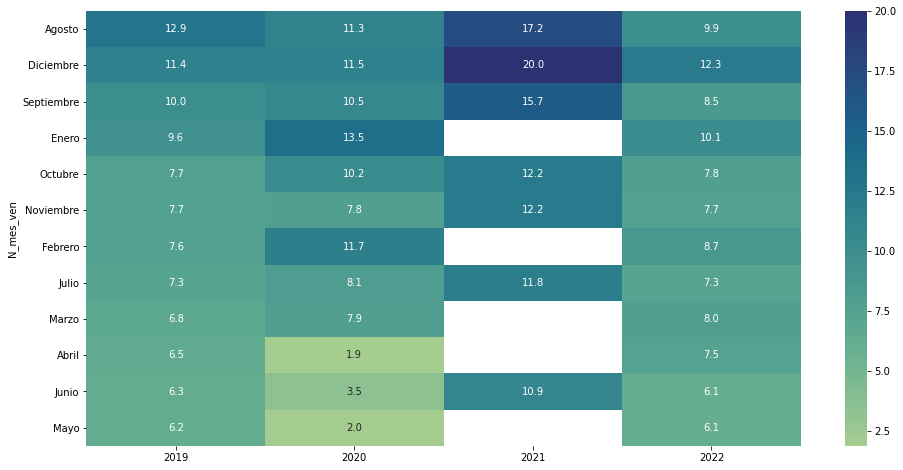

In [17]:
sns.heatmap(mes, annot=True, fmt=".1f", cmap="crest")

In [18]:
lista=['2019', '2020', '2021', '2022']
EXPLORA=pd.DataFrame()
for i in lista:
    EXPLORA1=ALL_DATA[ALL_DATA['PERIODO']==i].groupby(['N_dia_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=lista
dia=EXPLORA*100/EXPLORA.sum()
dia=dia.sort_values(by='2022',ascending=False)

<AxesSubplot:ylabel='N_dia_ven'>

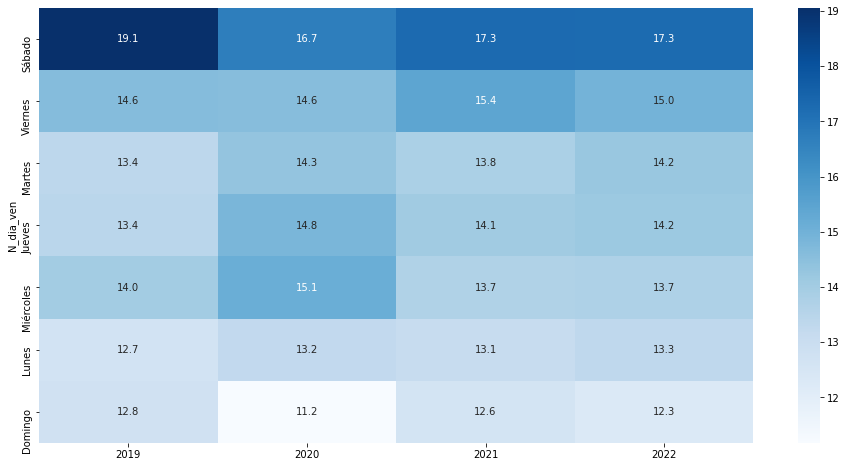

In [19]:
sns.heatmap(dia, annot=True, fmt=".1f", cmap="Blues")

In [20]:
lista=['2019', '2020', '2021', '2022']
EXPLORA=pd.DataFrame()
for i in lista:
    EXPLORA1=ALL_DATA[ALL_DATA['PERIODO']==i].groupby(['hora_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=lista
hora=EXPLORA*100/EXPLORA.sum()
#hora=hora.sort_values(by=2019,ascending=False)

<AxesSubplot:ylabel='hora_ven'>

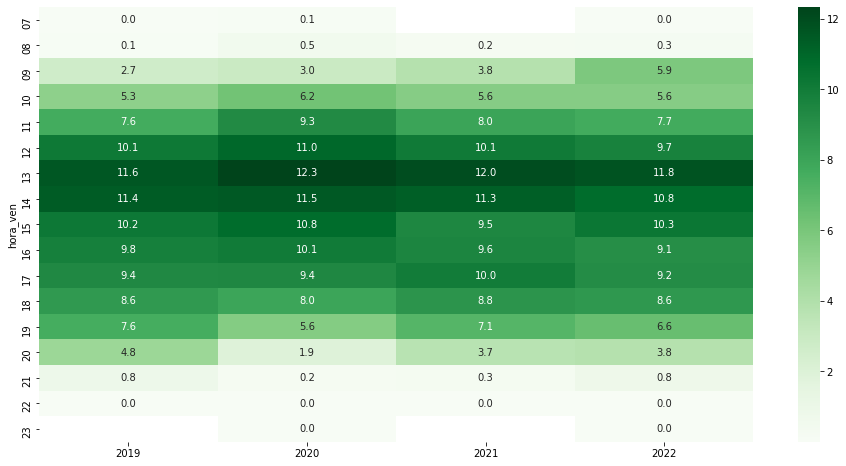

In [21]:
sns.heatmap(hora, annot=True, fmt=".1f", cmap="Greens")

In [22]:
ALL_22=ALL_DATA[ALL_DATA['PERIODO']=='2022']

In [23]:
hora=['07','08','09','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']
dia=['Lunes','Martes', 'Miércoles','Jueves', 'Viernes', 'Sábado', 'Domingo' ]

<AxesSubplot:ylabel='hora_ven'>

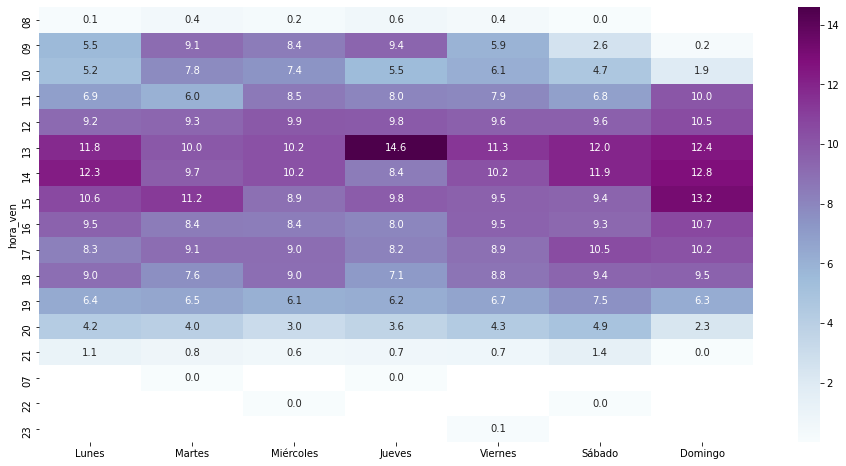

In [24]:
EXPLORA=pd.DataFrame()
for i in dia:
    EXPLORA1=ALL_22[ALL_22['N_dia_ven']==i].groupby(['hora_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=dia
hora=EXPLORA*100/EXPLORA.sum()
#hora=hora.sort_values(by=2019,ascending=False)
sns.heatmap(hora, annot=True, fmt=".1f", cmap="BuPu")

In [25]:
ALL_22.columns

Index(['Unnamed: 0', 'SUCURSAL', 'FECHA_VENTA', 'FECHA_REGISTRO', 'PROVEEDOR',
       'FOLIO_VENTA', 'TIPO_VENTA', 'CANTIDAD_VENTA', 'TOTAL_VENTA',
       'CODIGO_BARRAS', 'DTO_CLIENTE', 'TITULO', 'TIPO_PRODUCTO', 'PVP',
       'AUTOR', 'TEMA', 'SUBTEMA', 'DTO_COMERCIAL', 'COSTO_COMERCIAL',
       'PRECIO_FINAL', 'Num_dia_ven', 'FECHA_ven', 'N_dia_ven', 'N_mes_ven',
       'hora_ven', 'hora_ven_min', 'PERIODO', 'MES', 'FONDO_90d', 'FONDO_180d',
       'FONDO_540d', 'FONDO_1080d'],
      dtype='object')

In [26]:
ALL_22.N_mes_ven.unique()

array(['Abril', 'Octubre', 'Febrero', 'Agosto', 'Septiembre', 'Marzo',
       'Julio', 'Enero', 'Diciembre', 'Mayo', 'Junio', 'Noviembre'],
      dtype=object)

[Text(0.5, 1.0, ' Hora vs Mes')]

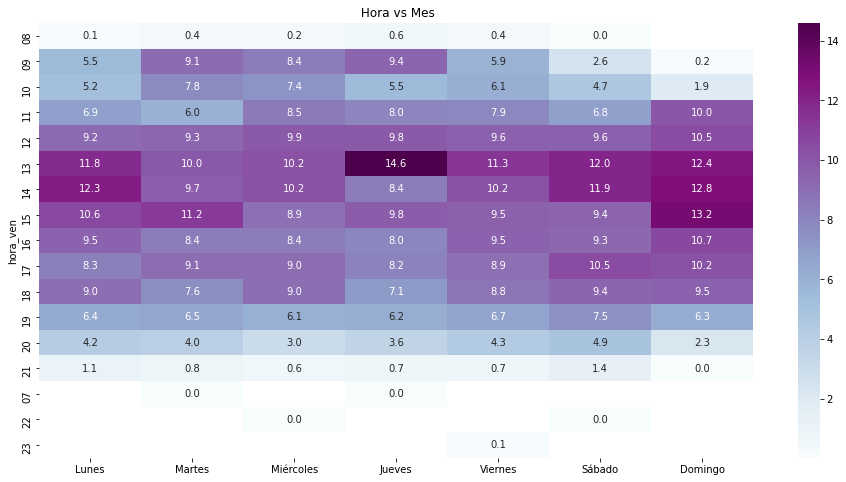

In [27]:
dia=['Lunes','Martes', 'Miércoles','Jueves', 'Viernes', 'Sábado', 'Domingo' ]
EXPLORA=pd.DataFrame()
for i in dia:
    EXPLORA1=ALL_22[ALL_22['N_dia_ven']==i].groupby(['hora_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=dia
hora=EXPLORA*100/EXPLORA.sum()
#hora=hora.sort_values(by=2019,ascending=False)

sns.heatmap(hora, annot=True, fmt=".1f", cmap="BuPu").set(title=' Hora vs Mes')

[Text(0.5, 1.0, ' Número-día vs Mes')]

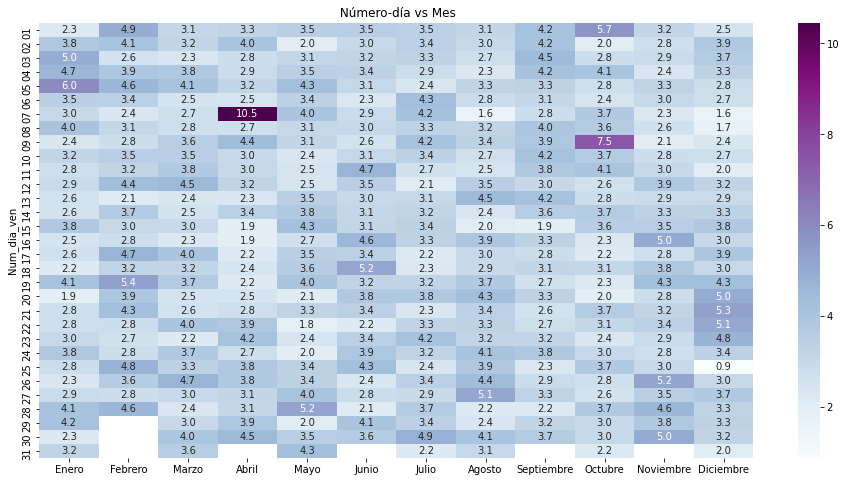

In [28]:
dia=['07','08','09','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']
mes=[ 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre','Octubre','Noviembre', 'Diciembre']
EXPLORA=pd.DataFrame()
for i in mes:
    EXPLORA1=ALL_22[ALL_22['N_mes_ven']==i].groupby(['Num_dia_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=mes
hora=EXPLORA*100/EXPLORA.sum()
sns.heatmap(hora, annot=True, fmt=".1f", cmap="BuPu").set(title=' Número-día vs Mes')
#hora=hora.sort_values(by=2019,ascending=False)

# limpieza de datos para suavizar la gráfica

In [29]:
ALL_22.groupby(['SUCURSAL','FOLIO_VENTA']).sum()[['CANTIDAD_VENTA']].reset_index().sort_values(by='CANTIDAD_VENTA',ascending=False).head(20)

,SUCURSAL,FOLIO_VENTA,CANTIDAD_VENTA
14207,SUCURSAL_6,1171255.0,86.0
4322,SUCURSAL_12,280.0,38.0
13433,SUCURSAL_6,1145483.0,37.0
9457,SUCURSAL_3,300280.0,37.0
14387,SUCURSAL_6,1176626.0,33.0
10717,SUCURSAL_4,663220.0,28.0
13881,SUCURSAL_6,1160361.0,25.0
14313,SUCURSAL_6,1174287.0,25.0
13564,SUCURSAL_6,1150078.0,23.0
14269,SUCURSAL_6,1173268.0,21.0


# Segmentamos los folios con volumen de venta inferior a 20

In [30]:
FOLIOS=ALL_22.groupby(['SUCURSAL','FOLIO_VENTA']).sum()[['CANTIDAD_VENTA']].reset_index().sort_values(by='CANTIDAD_VENTA',ascending=False)
FOLIOS=FOLIOS[FOLIOS['CANTIDAD_VENTA']>15]
FOLIOS=FOLIOS[['SUCURSAL','FOLIO_VENTA']]
FOLIOS['MAYOREO']='SI'
ALL_22_clean=pd.merge( ALL_22,FOLIOS, on=['SUCURSAL','FOLIO_VENTA'], how='outer').head(len(ALL_22))
ALL_22_clean=ALL_22_clean[ALL_22_clean['MAYOREO']!='SI']

In [31]:
dia=['07','08','09','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']
mes=[ 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre','Octubre','Noviembre', 'Diciembre']
EXPLORA=pd.DataFrame()
for i in mes:
    EXPLORA1=ALL_22_clean[ALL_22_clean['N_mes_ven']==i].groupby(['Num_dia_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA=pd.concat([EXPLORA,EXPLORA1],axis=1)
EXPLORA.columns=mes
hora=EXPLORA*100/EXPLORA.sum()
#hora=hora.sort_values(by=2019,ascending=False)

[Text(0.5, 1.0, 'Día vs Mes')]

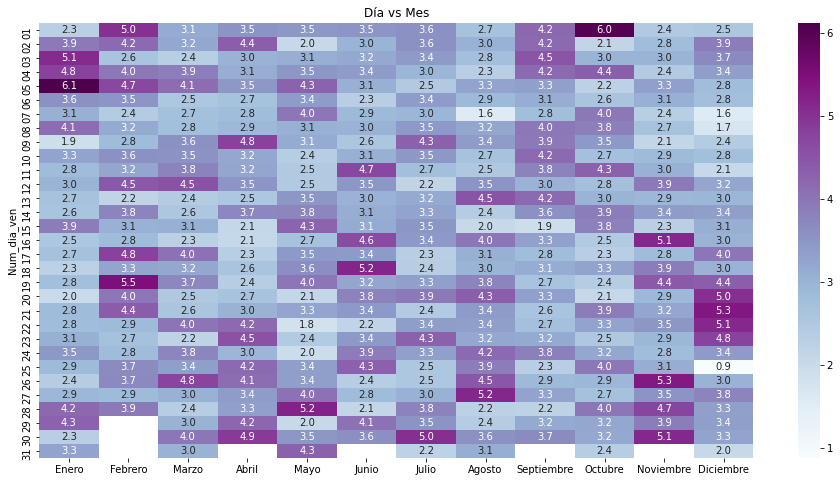

In [32]:
sns.heatmap(hora, annot=True, fmt=".1f", cmap="BuPu").set(title='Día vs Mes')

[Text(0.5, 1.0, 'Mapa con datos originales')]

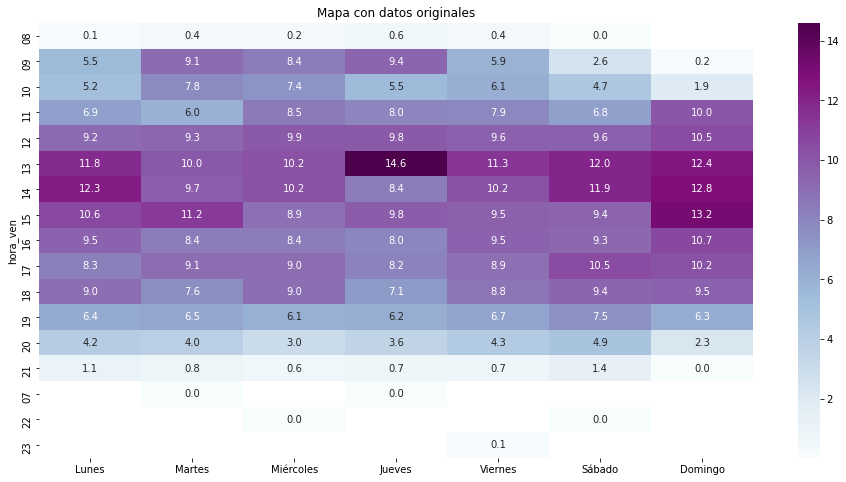

In [33]:
dia=['Lunes','Martes', 'Miércoles','Jueves', 'Viernes', 'Sábado', 'Domingo' ]
EXPLORA_1=pd.DataFrame()
EXPLORA_2=pd.DataFrame()

for i in dia:
    EXPLORA1=ALL_22[ALL_22['N_dia_ven']==i].groupby(['hora_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA2=ALL_22_clean[ALL_22_clean['N_dia_ven']==i].groupby(['hora_ven']).sum()[['TOTAL_VENTA']]
    EXPLORA_1=pd.concat([EXPLORA_1,EXPLORA1],axis=1)
    EXPLORA_2=pd.concat([EXPLORA_2,EXPLORA2],axis=1)
EXPLORA_1.columns=dia
EXPLORA_2.columns=dia
hora1=EXPLORA_1*100/EXPLORA_1.sum()
hora2=EXPLORA_2*100/EXPLORA_2.sum()
sns.heatmap(hora1, annot=True, fmt=".1f", cmap="BuPu").set(title='Mapa con datos originales')

[Text(0.5, 1.0, 'Mapa con limpieza de datos')]

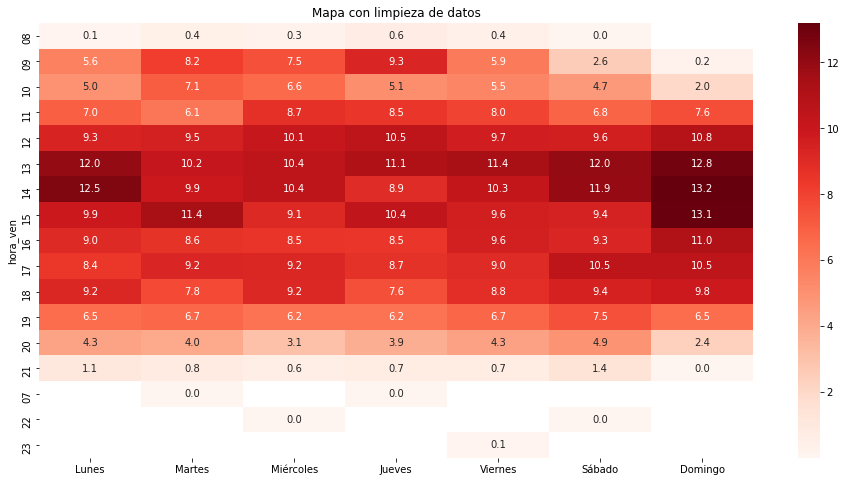

In [34]:
sns.heatmap(hora2, annot=True, fmt=".1f", cmap="Reds").set(title='Mapa con limpieza de datos')

## Partiendo de la segmentación entre fondo y novedad, que días cobra mas relevancia la venta de cada linea de negocio

In [35]:
ALL_22_clean.columns

Index(['Unnamed: 0', 'SUCURSAL', 'FECHA_VENTA', 'FECHA_REGISTRO', 'PROVEEDOR',
       'FOLIO_VENTA', 'TIPO_VENTA', 'CANTIDAD_VENTA', 'TOTAL_VENTA',
       'CODIGO_BARRAS', 'DTO_CLIENTE', 'TITULO', 'TIPO_PRODUCTO', 'PVP',
       'AUTOR', 'TEMA', 'SUBTEMA', 'DTO_COMERCIAL', 'COSTO_COMERCIAL',
       'PRECIO_FINAL', 'Num_dia_ven', 'FECHA_ven', 'N_dia_ven', 'N_mes_ven',
       'hora_ven', 'hora_ven_min', 'PERIODO', 'MES', 'FONDO_90d', 'FONDO_180d',
       'FONDO_540d', 'FONDO_1080d', 'MAYOREO'],
      dtype='object')

[Text(0.5, 1.0, 'Mapa con datos - Venta de Fondo')]

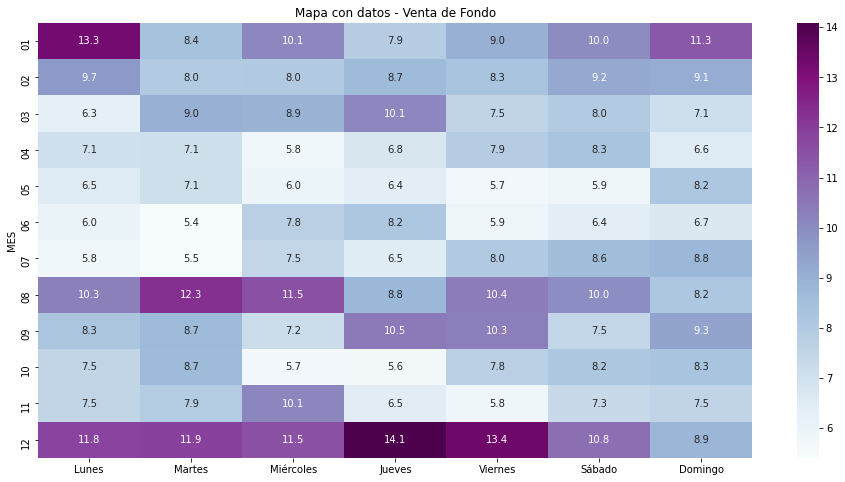

In [36]:
dia=['Lunes','Martes', 'Miércoles','Jueves', 'Viernes', 'Sábado', 'Domingo' ]
EXPLORA_1=pd.DataFrame()
EXPLORA_2=pd.DataFrame()

for i in dia:
    EXPLORA1=ALL_22_clean[(ALL_22_clean['N_dia_ven']==i)&(ALL_22_clean['FONDO_90d']=='FONDO')].groupby(['MES']).sum()[['TOTAL_VENTA']]
    EXPLORA2=ALL_22_clean[(ALL_22_clean['N_dia_ven']==i)&(ALL_22_clean['FONDO_90d']=='NOVEDAD')].groupby(['MES']).sum()[['TOTAL_VENTA']]
    EXPLORA_1=pd.concat([EXPLORA_1,EXPLORA1],axis=1)
    EXPLORA_2=pd.concat([EXPLORA_2,EXPLORA2],axis=1)
EXPLORA_1.columns=dia
EXPLORA_2.columns=dia
hora1=EXPLORA_1*100/EXPLORA_1.sum()
hora2=EXPLORA_2*100/EXPLORA_2.sum()

sns.heatmap(hora1, annot=True, fmt=".1f", cmap="BuPu").set(title='Mapa con datos - Venta de Fondo')

[Text(0.5, 1.0, 'Mapa de calor - Venta de Novedad')]

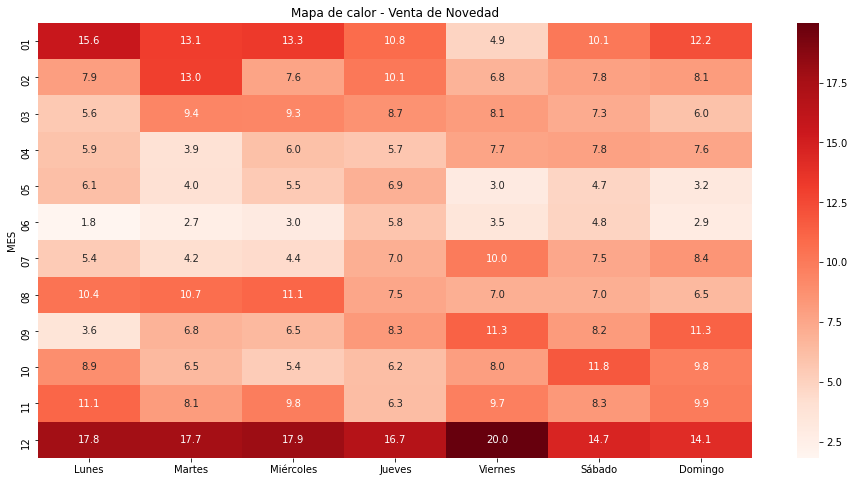

In [37]:
sns.heatmap(hora2, annot=True, fmt=".1f", cmap="Reds").set(title='Mapa de calor - Venta de Novedad')